# Binary classification with DNN / Phân loại nhị phân bằng DNN

## Import motdules

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Binary Classification

In [2]:
df = pd.read_csv('../data/diabetes2.csv')
# Xoá những dòng nào có ô không có giá trị (NA)
df = df.dropna()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [11]:
# import seaborn as sns
# sns.pairplot(df, hue = 'Outcome')

In [5]:
X = df.drop('Outcome', axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [6]:
y = df['Outcome']

## Train test split

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values,
                                                    test_size=0.2,
                                                    random_state=10)
from sklearn.preprocessing import MinMaxScaler
scaler =  MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping

## Early Stopping

In [10]:
early_stop = EarlyStopping(monitor='loss', patience=10, verbose=1)

## Tạo model

In [12]:
model = Sequential()
model.add(Dense(32, input_shape=(8,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
# model.add(Dense(10, activation='tanh'))
# model.add(Dense(8, activation='tanh'))
# model.add(Dense(4, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer = Adam(learning_rate=0.05), loss = 'binary_crossentropy', metrics=['accuracy'])

## Train model

In [13]:
model.fit(X_train, y_train, epochs=100, verbose=1, batch_size = 0)

Epoch 1/100
20/20 [==============================] - 1s 9ms/step - loss: 0.6244 - accuracy: 0.6564
Epoch 2/100
20/20 [==============================] - 0s 10ms/step - loss: 0.5661 - accuracy: 0.6987
Epoch 3/100
20/20 [==============================] - 0s 9ms/step - loss: 0.5088 - accuracy: 0.7248
Epoch 4/100
20/20 [==============================] - 0s 10ms/step - loss: 0.5316 - accuracy: 0.7248
Epoch 5/100
20/20 [==============================] - 0s 10ms/step - loss: 0.5277 - accuracy: 0.7378
Epoch 6/100
20/20 [==============================] - 0s 9ms/step - loss: 0.5102 - accuracy: 0.7296
Epoch 7/100
20/20 [==============================] - 0s 10ms/step - loss: 0.5113 - accuracy: 0.7329
Epoch 8/100
20/20 [==============================] - 0s 10ms/step - loss: 0.4794 - accuracy: 0.7524
Epoch 9/100
20/20 [==============================] - 0s 10ms/step - loss: 0.4752 - accuracy: 0.7720
Epoch 10/100
20/20 [==============================] - 0s 8ms/step - loss: 0.4707 - accuracy: 0.7769
Epo

20/20 [==============================] - 0s 11ms/step - loss: 0.4673 - accuracy: 0.7866
Epoch 83/100
20/20 [==============================] - 0s 9ms/step - loss: 0.4732 - accuracy: 0.7785
Epoch 84/100
20/20 [==============================] - 0s 9ms/step - loss: 0.4602 - accuracy: 0.7736
Epoch 85/100
20/20 [==============================] - 0s 11ms/step - loss: 0.4606 - accuracy: 0.7834
Epoch 86/100
20/20 [==============================] - 0s 9ms/step - loss: 0.4451 - accuracy: 0.7752
Epoch 87/100
20/20 [==============================] - 0s 7ms/step - loss: 0.4740 - accuracy: 0.7850
Epoch 88/100
20/20 [==============================] - 0s 8ms/step - loss: 0.4538 - accuracy: 0.7818
Epoch 89/100
20/20 [==============================] - 0s 9ms/step - loss: 0.4402 - accuracy: 0.7850
Epoch 90/100
20/20 [==============================] - 0s 9ms/step - loss: 0.4417 - accuracy: 0.7915
Epoch 91/100
20/20 [==============================] - 0s 8ms/step - loss: 0.4389 - accuracy: 0.7980
Epoch 92/10

In [14]:
# tính loss và accuracy (metrics)
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss: " + str(loss));
print("Accuracy: " + str(accuracy));

5/5 [==============================] - 0s 5ms/step - loss: 0.5125 - accuracy: 0.7727
Loss: 0.5124872326850891
Accuracy: 0.7727272510528564


In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [16]:
y_train_pred = model.predict(X_train) > 0.5
y_test_pred = model.predict(X_test) > 0.5

print("The Accuracy score on the Train set is: " + str(accuracy_score(y_train, y_train_pred)))
print("The Accuracy score on the Test set is: " + str(accuracy_score(y_test, y_test_pred)))

The Accuracy score on the Train set is: 0.7899022801302932
The Accuracy score on the Test set is: 0.7727272727272727


In [17]:
confusion_matrix(y_test, y_test_pred)

array([[72, 23],
       [12, 47]], dtype=int64)

In [19]:
# model.predict(X_test)

In [20]:
from sklearn.metrics import auc, roc_curve, classification_report
fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test), pos_label=1)
auc(fpr, tpr)

0.8337198929527208

In [21]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.86      0.76      0.80        95
           1       0.67      0.80      0.73        59

    accuracy                           0.77       154
   macro avg       0.76      0.78      0.77       154
weighted avg       0.79      0.77      0.78       154



Text(0, 0.5, 'True positive rate (Sensitivity)')

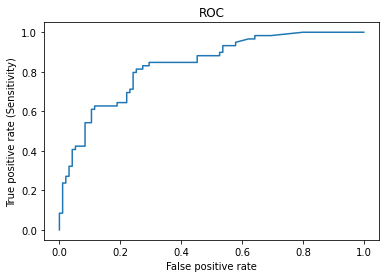

In [22]:
plt.plot(fpr, tpr)
plt.title('ROC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate (Sensitivity)')